## Importando bibliotecas

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## O Dataset e o Projeto

## Fonte: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo
## Descrição:
A cerveja é uma das bebidas mais democráticas e consumidas no mundo. Não sem razão, é perfeito para quase todas as situações, desde o happy hour até grandes festas de casamento.

O objetivo deste treinamento será estimar um modelo de Machine Learning utilizando a técnica de Regressão Linear para demonstrar os impactos das variáveis disponibilizadas neste dataset sobre o consumo de cerveja (Y). No final do projeto teremos um modelo de previsão para o consumo médio de cerveja segundo os inputs de um conjunto de variáveis (X's).

Os dados (amostra) foram coletados em São Paulo - Brasil, em uma área universitária, onde existem algumas festas com grupos de alunos de 18 a 28 anos de idade (média).

## Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>data</b> - Data</li>
    <li><b>temp_media</b> - Temperatura Média (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>chuva</b> - Precipitação (mm)</li>
    <li><b>fds</b> - Final de Semana (1 = Sim; 0 = Não)</li>
    <li><b>consumo</b> - Consumo de Cerveja (litros)</li>
</ul>

## Leitura dos dados


In [50]:
dados = pd.read_csv('arquivos/consumo_cerveja.csv',sep = ';')

## Visualizando os dados

In [51]:
dados

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900
...,...,...,...,...,...,...,...
360,27/12/2015,24.00,21.1,28.2,13.6,1,32307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20467


## Verificando o tamanho do dataset e as estatísticas descritivas

In [52]:
dados.shape

(365, 7)

In [53]:
dados.describe()

,temp_media,temp_min,temp_max,chuva,fds,consumo
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25401.367123
std,3.180108,2.826185,4.317366,12.417844,0.452001,4399.142703
min,12.900000,10.600000,14.500000,0.000000,0.000000,14343.000000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22008.000000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24867.000000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28631.000000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37937.000000


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [54]:
dados.corr()

,temp_media,temp_min,temp_max,chuva,fds,consumo
temp_media,1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
temp_min,0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
temp_max,0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
chuva,0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
fds,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
consumo,0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


# Análises gráficas

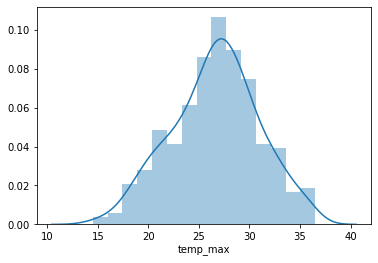

In [55]:
sns.distplot(dados.temp_max)

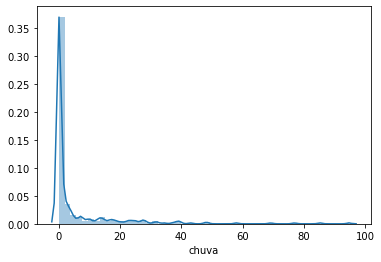

In [56]:
sns.distplot(dados.chuva)

## Plotando a variável *dependente* (y)

Text(0.5, 1.0, 'Consumo de cerveja ao longo do ano')

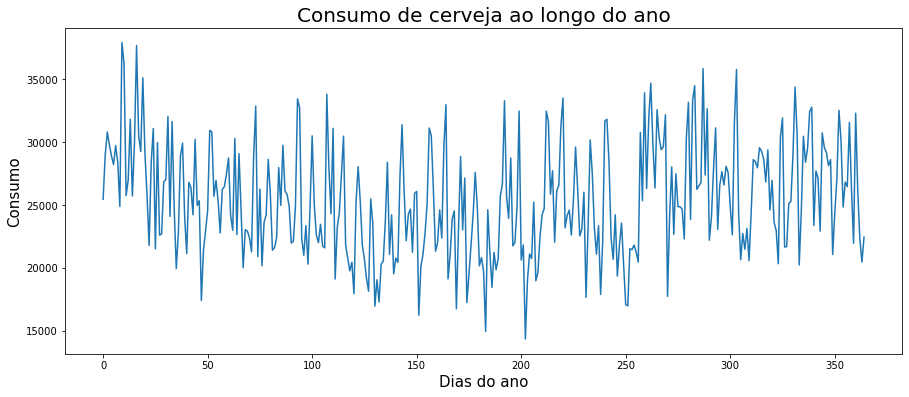

In [57]:
ax = dados.consumo.plot(figsize = (15,6))
ax.set_ylabel('Consumo',fontsize= 15)
ax.set_xlabel('Dias do ano',fontsize= 15)
ax.set_title('Consumo de cerveja ao longo do ano', fontsize=  20)

## Box plot da variável *dependente* (y)

Text(0.5, 0, 'Consumo')

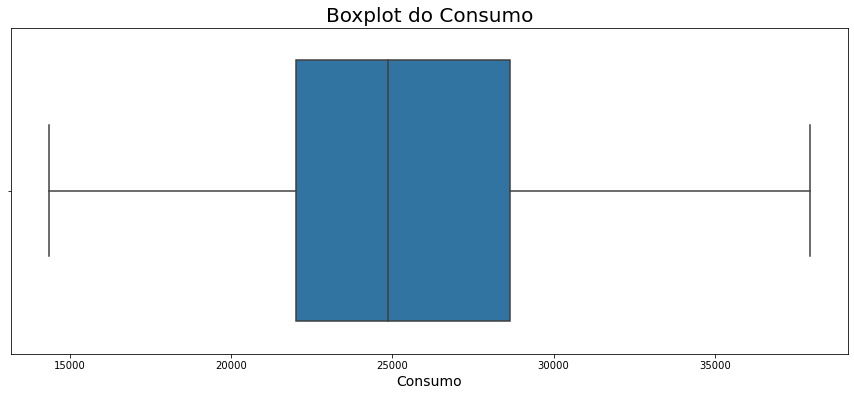

In [58]:
ax = sns.boxplot(dados.consumo)
ax.figure.set_size_inches(15,6)
ax.set_title('Boxplot do Consumo', fontsize = 20)
ax.set_xlabel('Consumo', fontsize = 14)

## Distribuição de frequências da variável *dependente* (y)

Text(0.5, 0, 'Consumo em Litros')

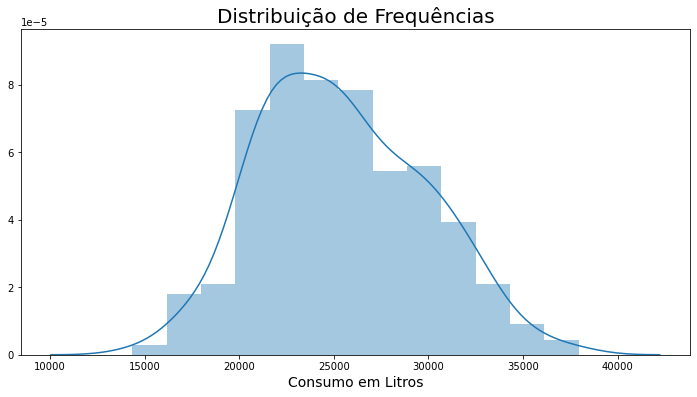

In [59]:
ax = sns.distplot(dados.consumo)
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuição de Frequências',fontsize = 20)
ax.set_xlabel('Consumo em Litros',fontsize = 14)

## Investigando a variável *dependente* (y) segundo a variável explicativa Fim de Semana

Text(0, 0.5, 'Consumo')

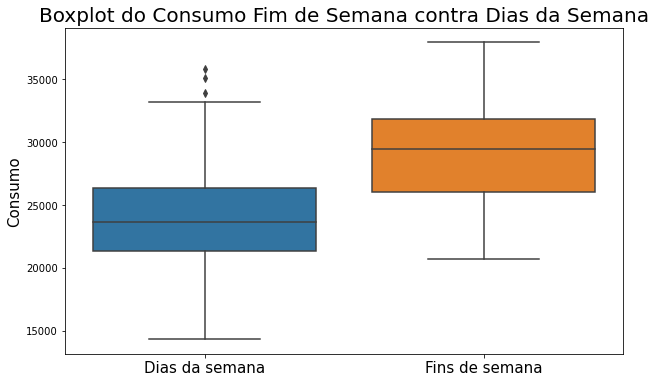

In [60]:
ax = sns.boxplot(x = dados.fds, y = dados.consumo)
ax.figure.set_size_inches(10,6)
ax.set_title('Boxplot do Consumo Fim de Semana contra Dias da Semana', fontsize = 20)
ax.set_xlabel('')
ax.set_xticklabels(['Dias da semana','Fins de semana'],fontsize = 15)
ax.set_ylabel('Consumo',fontsize = 15)

In [61]:
q3 = dados.query('fds ==0').quantile(.75)
q1 = dados.query('fds== 0').quantile(.25)
IIQ = q3 - q1
limite_superior = q3['consumo'] + 1.5*IIQ['consumo']
dados[dados['consumo'] > limite_superior]

,data,temp_media,temp_min,temp_max,chuva,fds,consumo
9,10/01/2015,26.76,22.1,34.2,0.0,1,37937
10,11/01/2015,27.62,22.2,34.8,3.4,1,36254
16,17/01/2015,28.86,22.0,35.8,0.0,1,37690
19,20/01/2015,27.68,23.3,35.6,0.6,0,35127
259,17/09/2015,27.26,20.4,33.0,0.0,0,33930
262,20/09/2015,23.60,19.2,33.3,0.0,1,34695
283,11/10/2015,22.48,19.6,30.0,0.0,1,34496
287,15/10/2015,28.12,18.9,35.8,0.0,0,35861
303,31/10/2015,23.18,18.2,29.3,0.0,1,35781
331,28/11/2015,23.70,18.7,29.8,0.0,1,34382


## Gráficos de dispersão entre as variáveis do dataset

Text(0.5, 1.15, 'Dispersão entre as Variáveis')

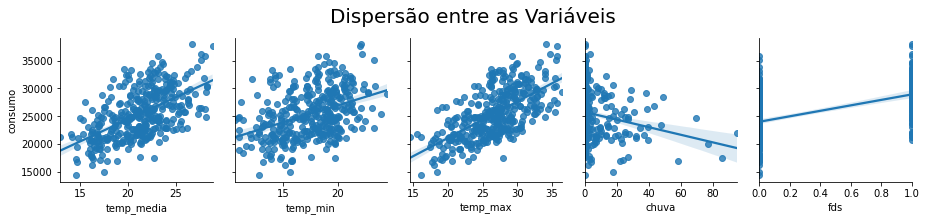

In [62]:
ax = sns.pairplot(dados, y_vars = 'consumo', x_vars = ['temp_media','temp_min','temp_max','chuva','fds'],kind = 'reg')
ax.fig.suptitle('Dispersão entre as Variáveis',fontsize = 20, y = 1.15)

## Importando o *train_test_split* da biblioteca *scikit-learn*


In [63]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Consumo de Cerveja (y)

In [64]:
y = dados['consumo']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [65]:
X = dados[['temp_max','chuva','fds']]

## Criando os datasets de treino e de teste

In [66]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 2811)

## Verificando os tamanhos dos arquivos gerados pela função *train_test_split*

In [67]:
x_train.shape

(255, 3)

In [68]:
x_test.shape

(110, 3)

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*


In [69]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [70]:
modelo = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)


In [71]:
modelo.fit(x_train,y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

In [72]:
print('R² = {}'.format(modelo.score(x_train,y_train)))

R² = 0.7336167014928967


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

In [73]:
y_previsto = modelo.predict(x_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo


In [74]:
print('R² = %s' %metrics.r2_score(y_test,y_previsto))

R² = 0.690736466775069


## Obtendo o intercepto do modelo

In [75]:
modelo.intercept_

5951.976339312445

## Obtendo os coeficientes de regressão


In [76]:
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

## Criando um DataFrame para armazenar os coeficientes do modelo

In [77]:
index = ['intercepto','Temperatura Máxima','Chuva (mm)','Final de Semana']

In [78]:
pd.DataFrame(data= np.append(modelo.intercept_, modelo.coef_), index = index,columns = ['Parâmetros'])

,Parâmetros
intercepto,5951.976339
Temperatura Máxima,684.736759
Chuva (mm),-60.782435
Final de Semana,5401.083339


## Gerando as previsões do modelo para os dados de TREINO

In [79]:
y_previsto_train = modelo.predict(x_train)

## Gráfico de dispersão entre valor estimado e valor real


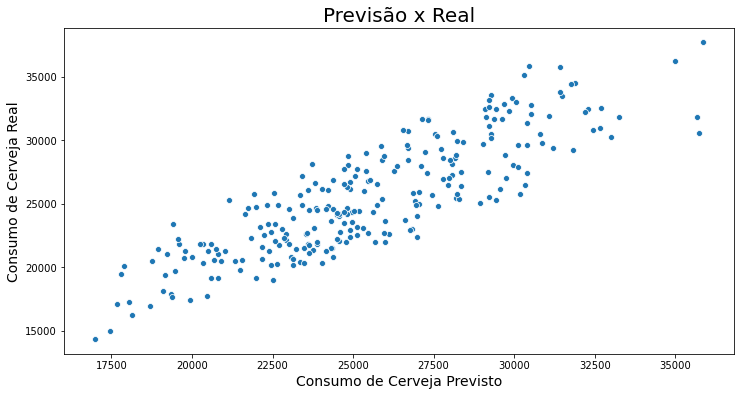

In [80]:
ax = sns.scatterplot(x= y_previsto_train, y= y_train)
ax.set_title('Previsão x Real', fontsize = 20)
ax.set_ylabel('Consumo de Cerveja Real',fontsize= 14)
ax.set_xlabel('Consumo de Cerveja Previsto',fontsize = 14)
ax.figure.set_size_inches(12,6)

## Obtendo os resíduos

In [81]:
residuo = y_train - y_previsto_train

## Gráfico de dispersão entre valor estimado e resíduos


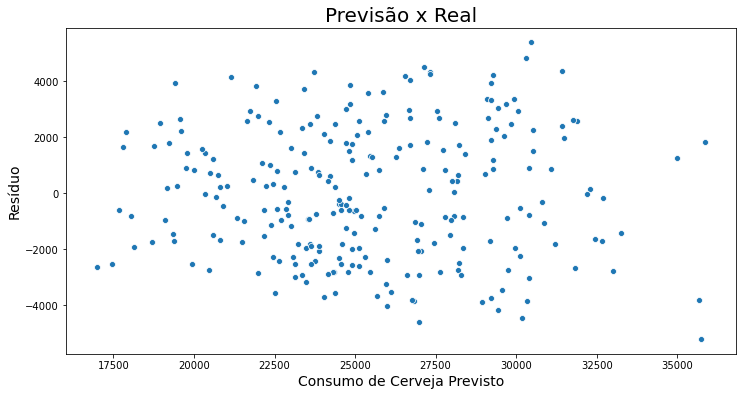

In [82]:
ax = sns.scatterplot(x = y_previsto_train, y = residuo)
ax.set_title('Previsão x Real', fontsize = 20)
ax.set_ylabel('Resíduo',fontsize= 14)
ax.set_xlabel('Consumo de Cerveja Previsto',fontsize = 14)
ax.figure.set_size_inches(12,6)

## Utilizando os resíduos ao quadrado

<img width='800px' src='Residuoaoquadrado.jpg'>

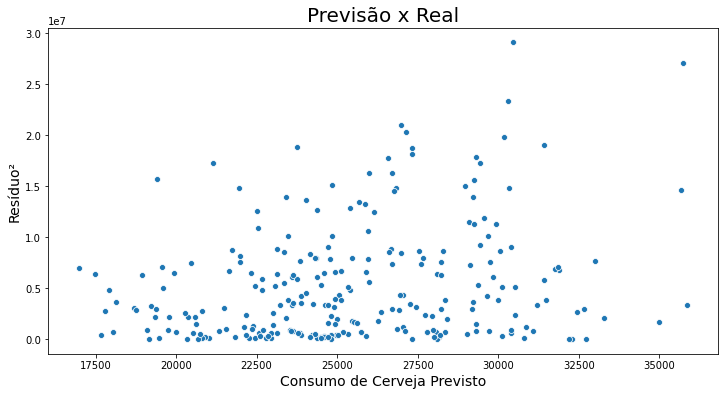

In [83]:
ax = sns.scatterplot(x = y_previsto_train, y = residuo**2)
ax.set_title('Previsão x Real', fontsize = 20)
ax.set_ylabel('Resíduo²',fontsize= 14)
ax.set_xlabel('Consumo de Cerveja Previsto',fontsize = 14)
ax.figure.set_size_inches(12,6)

## Plotando a distribuição de frequências dos resíduos

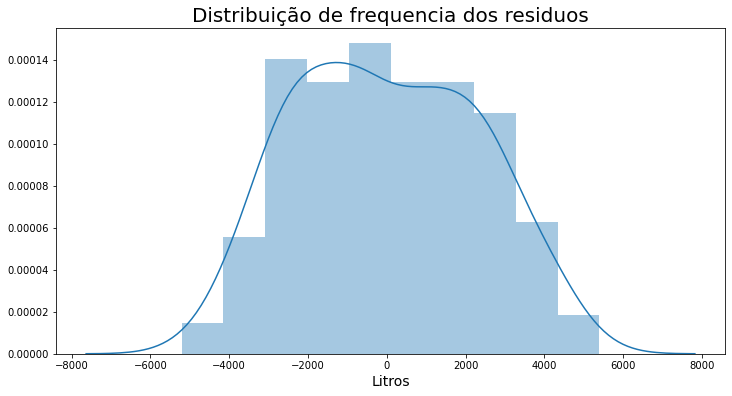

In [84]:
ax = sns.distplot(residuo)
ax.set_title('Distribuição de frequencia dos residuos', fontsize = 20)
ax.set_xlabel('Litros',fontsize = 14)
ax.figure.set_size_inches(12,6)

## Estimando um novo modelo com a substituição da variável explicativa Temperatura Máxima pela Temperatuda Média

In [85]:
X2 = dados[['temp_media','chuva','fds']]

In [86]:
x2_train,x2_test,y2_train,y2_test = train_test_split(X2,y,test_size = 0.3,random_state = 2811)

In [87]:
modelo2 = LinearRegression()

## Obtendo o coeficiente de determinação (R²) do novo modelo estimado e comparando com o resultado do modelo anterior

In [88]:
print('R² com a temp_maxima = {}'.format(modelo.score(x_train,y_train)))

R² com a temp_maxima = 0.7336167014928967


In [89]:
modelo2.fit(x2_train,y2_train)

LinearRegression()

In [90]:
print('R² com a temp_media = {}'.format(modelo2.score(x2_train,y2_train)))

R² com a temp_media = 0.6617640611940382


## Gerando previsões para os dados de TESTE (X_test e X2_test) utilizando o método *predict()* dos objetos "modelo" e "modelo_2"

In [91]:
y_previsto = modelo.predict(x_test)
y_previsto2 = modelo2.predict(x2_test)

## Obtendo o coeficiente de determinação (R²) para as previsões dos dois modelos

In [92]:
print('Modelo com temperatura média = {}'.format(metrics.r2_score(y2_test,y_previsto2)))


Modelo com temperatura média = 0.6574588953371101


In [93]:
print('Modelo com temperatura máxima = {}'.format(metrics.r2_score(y_test,y_previsto)))

Modelo com temperatura máxima = 0.690736466775069


## Métricas da regressão


## Obtendo métricas para o modelo com Temperatura Média

In [94]:
EQM_2 = metrics.mean_squared_error(y2_test,y_previsto2).round(2)
REQM_2 = np.sqrt(metrics.mean_squared_error(y2_test,y_previsto2)).round(2)
R2_2 = metrics.r2_score(y2_test,y_previsto2).round(2)

pd.DataFrame([EQM_2,REQM_2,R2_2],['EQM','REQM','R²'],columns = ['Métricas'])

,Métricas
EQM,6060775.46
REQM,2461.86
R²,0.66


## Obtendo métricas para o modelo com Temperatura Máxima

In [95]:
EQM = metrics.mean_squared_error(y_test,y_previsto).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test,y_previsto)).round(2)
R2 = metrics.r2_score(y_test,y_previsto).round(2)

pd.DataFrame([EQM,REQM,R2],['EQM','REQM','R²'],columns = ['Métricas'])

,Métricas
EQM,5471976.38
REQM,2339.23
R²,0.69


## Criando um simulador simples


In [96]:
temp_max = 30.5
chuva= 12.2
fds = 0
entrada = [[temp_max,chuva,fds]]

print('{0:.2f} Litros' .format(modelo.predict(entrada)[0]))

26094.90 Litros


## Salvando o modelo estimado

In [97]:
import pickle

In [98]:
output = open('modelo_consumo_cerveja', 'wb')
pickle.dump(modelo, output)
output.close()

In [99]:
# #import pickle

# modelo = open('modelo_consumo_cerveja','rb')
# lm_new = pickle.load(modelo)
# modelo.close()

# temp_max = 30.5
# chuva = 12.2
# fds = 0
# entrada = [[temp_max, chuva, fds]]
# print('{0:.2f} litros'.format(lm_new.predict(entrada)[0]))